In [1]:
#Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#Funções de plotagem interativa
%matplotlib notebook

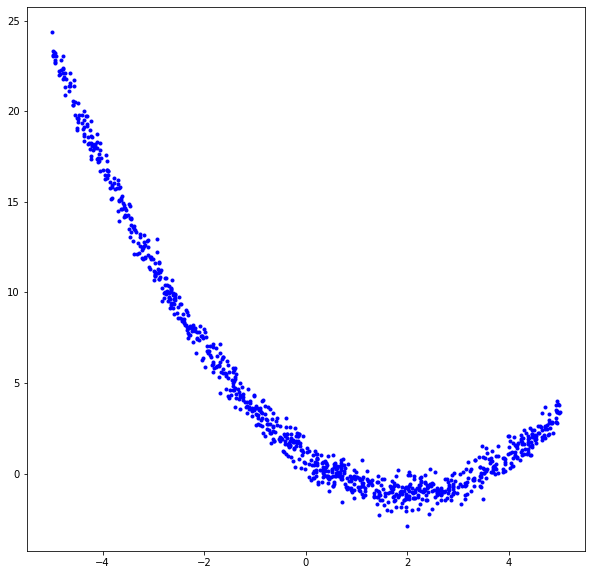

In [2]:
#Importar os dados da planilha training - localizada na pasta da lista de exercícios
df = pd.read_csv('training.csv', header=None)
x = df[0].to_numpy()
y = df[1].to_numpy()
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'b.')

In [3]:
#Obtenho o número de exemplos da planilha
M = int(len(x))

#Crio a variável x0, como um vetor de 1's - BIAS
x0 = np.ones((M,1))
x1 = np.reshape(x,(M,1))
x2 = x1
x3 = x1
y = np.reshape(y,(M,1))

In [5]:
#Concateno os vetores x0 e x1
X = np.c_[x0, x1, x2, x3]

#Cálculo dos parâmetros a, utilizando a fórmula fechada.
#yhat = h(x)

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0]*x0 + a_opt[1, 0]*x1 + a_opt[2, 0]*x2*x2 + a_opt[3, 0]*x3*x3*x3
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

In [14]:
#Implementação do algoritmo do batch

#Passo de aprendizagem
alpha = 0.04

#Número máximo de iterações
n_iterations = M

#Inicialização dos parâmetros a = -10
a = np.zeros((4,1))
a[0] = -10;
a[1] = -10;
a[2] = -10;
a[3] = -10;

# Criação de vetor para o armazenamento dos valores de a
a_hist = np.zeros((4, n_iterations+1))

a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]
a_hist[2, 0] = a[2]
a_hist[3, 0] = a[3]

#Criação de vetor para armazenar os valores do erro
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

#Loop batch
iteration = 0
error = 1

#Vetor criado para armazenar os valores do gradiente ao longo das iterações
grad_hist = np.zeros((4, n_iterations))


#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    gradients = -2/M * X.T.dot(y - X.dot(a))
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    grad_hist[2, iteration] = gradients[2]
    grad_hist[3, iteration] = gradients[3]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    a_hist[2, iteration+1] = a[2]
    a_hist[3, iteration+1] = a[3]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
    
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    
    iteration = iteration + 1

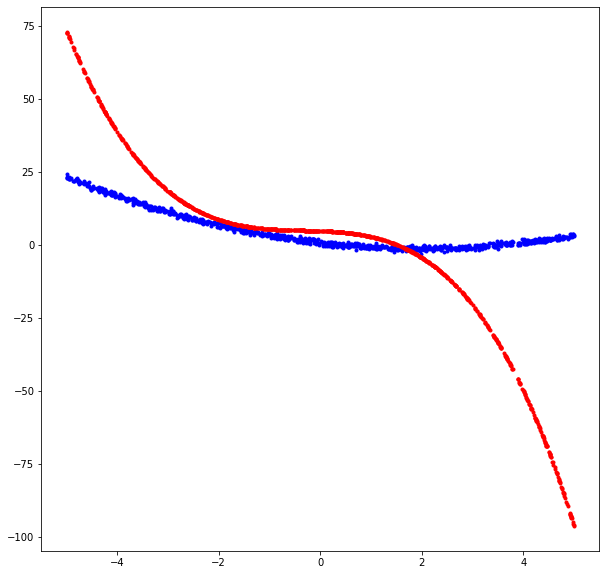

In [15]:
#Gráfico x vs. y e x vs. h
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'b.')
plt.plot(x, yhat, 'r.')

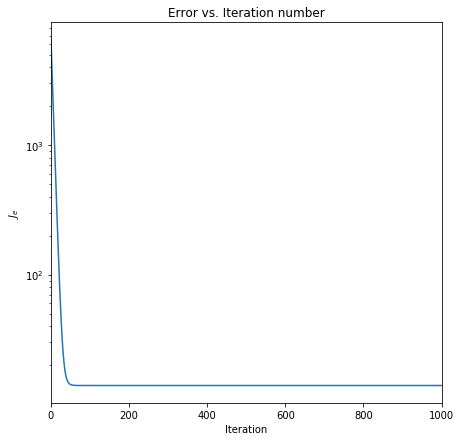

<Figure size 432x288 with 0 Axes>

In [16]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [18]:
#Retorna os valores para comparação
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))
print('a2_opt: ' + str(a_opt[2, 0]))
print('a3_opt: ' + str(a_opt[3, 0]))

print('a0_batch: ' + str(a[0, 0]))
print('a1_batch: ' + str(a[1, 0]))
print('a2_batch: ' + str(a[2, 0]))
print('a3_batch: ' + str(a[3, 0]))

a0_opt: 4.939361968021298
a1_opt: -0.6531010810346769
a2_opt: -0.6531010810346769
a3_opt: -0.6531010810346769
a0_batch: 4.9393619680212915
a1_batch: -0.6531010810346766
a2_batch: -0.6531010810346766
a3_batch: -0.6531010810346766


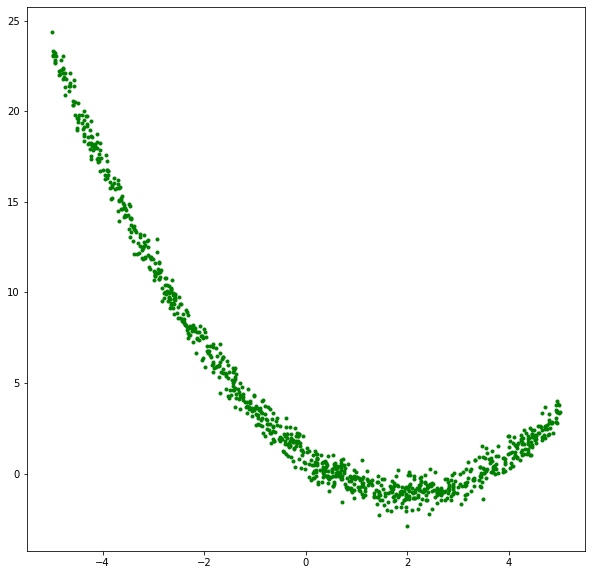

In [19]:
#Importar os dados da planilha predicting - localizada na pasta da lista de exercícios
df = pd.read_csv('predicting.csv', header=None)
xp = df[0].to_numpy()
yp = df[1].to_numpy()
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'g.')

In [20]:
#Extrair e organizar os dados da planilha predicting
y_predict = np.reshape(yp,(M,1))

In [21]:
#Cálculo de erro quadrático médio - Utilizando yhat(forma fechada) e hx (utilizando pesos do gd)
hx = a[0, 0]*x0 + a[1, 0]*x1 + a[2, 0]*x2*x2 + a[3, 0]*x3*x3*x3

J_predict1 = (1/M)*np.sum(np.power((y_predict - hx), 2) )
J_predict2 = (1/M)*np.sum(np.power((y_predict - yhat), 2) )

In [22]:
print(J_predict1)
print(J_predict2)

828.847107512821
828.8471075128218
